In [22]:
import pandas as pd
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence as olsi

%matplotlib inline
import matplotlib.backends

df=pd.read_csv("prostate_cancer.csv")
df_copy=pd.read_csv("prostate_cancer.csv")
df.insert(0, "intercept",value=np.ones(97))

# Closed Form Solution


In [186]:
# 3. Closed form solution.
#Creating matrix for each predictors X
xcol= pd.read_csv("prostate_cancer.csv").drop('lpsa', axis=1)
x= df.drop('lpsa', axis=1).to_numpy()
xcopy= df_copy.drop('lpsa', axis=1).to_numpy()
y= df["lpsa"].to_numpy().reshape(97,1)

#computing beta using the closed form equation.
#Xt is the transpose matrix
Xt= x.transpose()
prod_mat=np.matmul(Xt,x)
inv_prod= inv(prod_mat)
beta= np.matmul(inv_prod,np.dot(Xt,y))
beta


array([[ 0.18156085],
       [ 0.56434128],
       [ 0.62201979],
       [-0.02124819],
       [ 0.09671252],
       [ 0.7616734 ],
       [-0.10605094],
       [ 0.04922793],
       [ 0.00445751]])

In [185]:
y.reshape(97,1)

array([[-0.4307829],
       [-0.1625189],
       [-0.1625189],
       [-0.1625189],
       [ 0.3715636],
       [ 0.7654678],
       [ 0.7654678],
       [ 0.8544153],
       [ 1.047319 ],
       [ 1.047319 ],
       [ 1.2669476],
       [ 1.2669476],
       [ 1.2669476],
       [ 1.3480731],
       [ 1.3987169],
       [ 1.446919 ],
       [ 1.4701758],
       [ 1.4929041],
       [ 1.5581446],
       [ 1.5993876],
       [ 1.6389967],
       [ 1.6582281],
       [ 1.6956156],
       [ 1.7137979],
       [ 1.7316555],
       [ 1.7664417],
       [ 1.8000583],
       [ 1.8164521],
       [ 1.8484548],
       [ 1.8946169],
       [ 1.9242487],
       [ 2.008214 ],
       [ 2.008214 ],
       [ 2.0215476],
       [ 2.0476928],
       [ 2.0856721],
       [ 2.1575593],
       [ 2.1916535],
       [ 2.2137539],
       [ 2.2772673],
       [ 2.2975726],
       [ 2.3075726],
       [ 2.3272777],
       [ 2.3749058],
       [ 2.5217206],
       [ 2.5533438],
       [ 2.5687881],
       [ 2.56

# Gradient Descent

In [231]:

from numpy import linalg as LA
prod_4_eig= np.matmul(x.T,x)
e_value,e_vector=LA.eig(prod_4_eig)

step_alpha=1/(e_value.max())
beta_g= np.ones(9).reshape(9,1)
gradient= -2*((x.T)@((y.reshape(97,1))-(x@beta_g)))
loss= []
i=0
while(np.linalg.norm(gradient,2)>0.001):
        
        beta_g=beta_g-step_alpha*gradient         
        square_loss= np.sqrt((((y-(x@beta_g)).T)@(y-(x@beta_g)))/88)
        loss.append(square_loss)
        gradient= -2*((x.T)@((y.reshape(97,1))-(x@beta_g)))
        if(i==500):
            break
        i=i+1
        
        


In [232]:
loss

[array([[108.82694801]]),
 array([[108.63845418]]),
 array([[108.53463607]]),
 array([[108.4774846]]),
 array([[108.44602811]]),
 array([[108.42871216]]),
 array([[108.41917586]]),
 array([[108.41391901]]),
 array([[108.41101601]]),
 array([[108.40940766]]),
 array([[108.40851138]]),
 array([[108.40800673]]),
 array([[108.4077175]]),
 array([[108.40754675]]),
 array([[108.40744118]]),
 array([[108.40737148]]),
 array([[108.40732152]]),
 array([[108.40728244]]),
 array([[108.40724935]]),
 array([[108.40721957]]),
 array([[108.40719164]]),
 array([[108.40716473]]),
 array([[108.4071384]]),
 array([[108.40711241]]),
 array([[108.40708662]]),
 array([[108.40706096]]),
 array([[108.40703538]]),
 array([[108.40700987]]),
 array([[108.40698441]]),
 array([[108.40695899]]),
 array([[108.40693361]]),
 array([[108.40690827]]),
 array([[108.40688297]]),
 array([[108.4068577]]),
 array([[108.40683247]]),
 array([[108.40680728]]),
 array([[108.40678212]]),
 array([[108.406757]]),
 array([[108.40673

Text(0, 0.5, 'Loss')

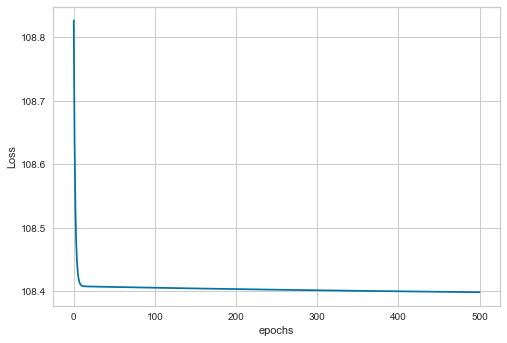

In [234]:
loss_series=pd.Series(loss)
plt.plot(loss_series)
plt.xlabel("epochs")
plt.ylabel("Loss")

In [164]:
gradient= -2*((x.T)@((y.reshape(97,1))-(x@beta_g)))
gradient

array([[  -480.8070544 ],
       [  -840.94987481],
       [ -1785.96459752],
       [-30987.0534954 ],
       [  -106.0683162 ],
       [  -156.0451334 ],
       [   -83.83461725],
       [ -3305.7422026 ],
       [-14362.6214028 ]])

In [156]:
(y.reshape(97,1))-(x@beta_g)

array([[-0.4307829],
       [-0.1625189],
       [-0.1625189],
       [-0.1625189],
       [ 0.3715636],
       [ 0.7654678],
       [ 0.7654678],
       [ 0.8544153],
       [ 1.047319 ],
       [ 1.047319 ],
       [ 1.2669476],
       [ 1.2669476],
       [ 1.2669476],
       [ 1.3480731],
       [ 1.3987169],
       [ 1.446919 ],
       [ 1.4701758],
       [ 1.4929041],
       [ 1.5581446],
       [ 1.5993876],
       [ 1.6389967],
       [ 1.6582281],
       [ 1.6956156],
       [ 1.7137979],
       [ 1.7316555],
       [ 1.7664417],
       [ 1.8000583],
       [ 1.8164521],
       [ 1.8484548],
       [ 1.8946169],
       [ 1.9242487],
       [ 2.008214 ],
       [ 2.008214 ],
       [ 2.0215476],
       [ 2.0476928],
       [ 2.0856721],
       [ 2.1575593],
       [ 2.1916535],
       [ 2.2137539],
       [ 2.2772673],
       [ 2.2975726],
       [ 2.3075726],
       [ 2.3272777],
       [ 2.3749058],
       [ 2.5217206],
       [ 2.5533438],
       [ 2.5687881],
       [ 2.56

# Built in Function to solve optimization

In [116]:
# 5. using built in function to solve optimization.
from sklearn.linear_model import LinearRegression

mlinear = LinearRegression()
mlinear.fit(xcopy, y)

print(f'Coefficients: {mlinear.coef_}')
print(f'Intercept: {mlinear.intercept_}')
print(f'R^2 score: {mlinear.score(xcopy, y)}')



Coefficients: [ 0.56434128  0.62201979 -0.02124819  0.09671252  0.7616734  -0.10605094
  0.04922793  0.00445751]
Intercept: 0.18156084546893503
R^2 score: 0.6633895654989246


# Relationship between Preditors and Response

In [36]:
#6. relationship between predictors and response
relationlm = smf.ols('lpsa~lcavol+lweight+age+lbph+svi+lcp+gleason+pgg45',df_copy).fit()
relationlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     21.68
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           7.65e-18
Time:                        14:14:56   Log-Likelihood:                -98.248
No. Observations:                  97   AIC:                             214.5
Df Residuals:                      88   BIC:                             237.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1816      1.321      0.137      0.891      -2.443       2.806
lcavol         0.5643      0.088      6.425      0.000       0.390       0.739
lweight        0.6220      0.201      3.096      0.003       0.223       1.021
age           -0.0212      0.011     -1.917      0.058      -0.043       0.001
lbph           0.0967      0.058      1.670      0.098      -0.018       0.212
svi            0.7617      0.241      3.158      0.002       0.282       1.241
lcp           -0.1061      0.090     -1.180      0.241      -0.285       0.073
gleason        0.0492      0.155      0.317      0.752      -0.259       0.358
pgg45          0.0045      0.004      1.021      0.310      -0.004       0.013
==============================================================================
Omnibus:                        0.563   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.183
Skew:                           0.017   Prob(JB):                        0.913
Kurtosis:                       3.210   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Strength of the relationship

In [9]:
#Strength of the relationship
rse= np.sqrt(relationlm.mse_resid)
print(rse)

0.6994999735015665


# Finding y for given values of x

In [62]:
# 9. finding y for given values of x
import math
intercept=1
lcavol= 1.35
lweight= 3.62
age=64
lbph=0.1
svi=0
lcp=-0.18
gleason=6.75
pgg45=24

xi=np.array([intercept,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45])

yi=np.matmul(xi.transpose(),beta)
print("The log psa value is",yi)
print("The psa level is",math.exp(yi))


The log psa value is 2.3032786254511066
The psa level is 10.006937730063019


# Problems in Linear Regression

<AxesSubplot:>

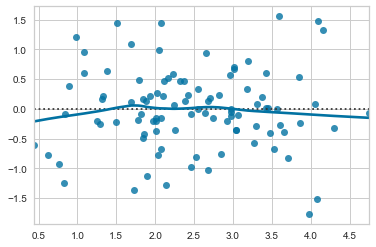

In [49]:
# 10. Problems in Linear Regression.

#Non-linearity residual plot vs fitted
fitted= mlinear.predict(xcopy)
residual= y-fitted
sns.residplot(x=fitted, y=residual, lowess=True)



C:\Users\asoka\AppData\Local\Temp\ipykernel_2524\1733268862.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  corr_error.show()


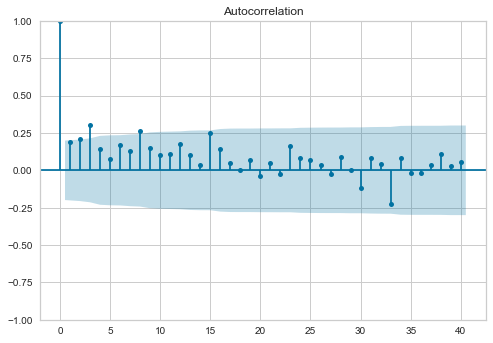

In [42]:
#correlation of error terms
import statsmodels.tsa.api as smt

corr_error = smt.graphics.plot_acf(resids, lags=40 , alpha=0.05)
corr_error.show()

In [41]:
#heteroscedasticity
import statsmodels.stats.api as sms
resids= relationlm.resid
bptest = pd.DataFrame(sms.het_breuschpagan(resids, relationlm.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])
gqtest = pd.DataFrame(sms.het_goldfeldquandt(resids, relationlm.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])
print("Breusch-Pagan")
print(bptest)
print("Goldfeld-Quandt")
print(gqtest)

Breusch-Pagan
                                   value
Lagrange multiplier statistic  12.656965
p-value                         0.124210
f-value                         1.650719
f p-value                       0.122047
Goldfeld-Quandt
                value
F statistic  0.959019
p-value      0.551436


In [16]:
df_copy

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


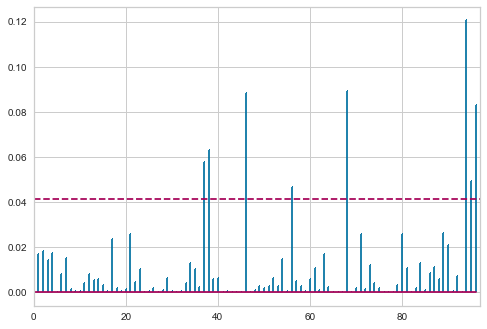

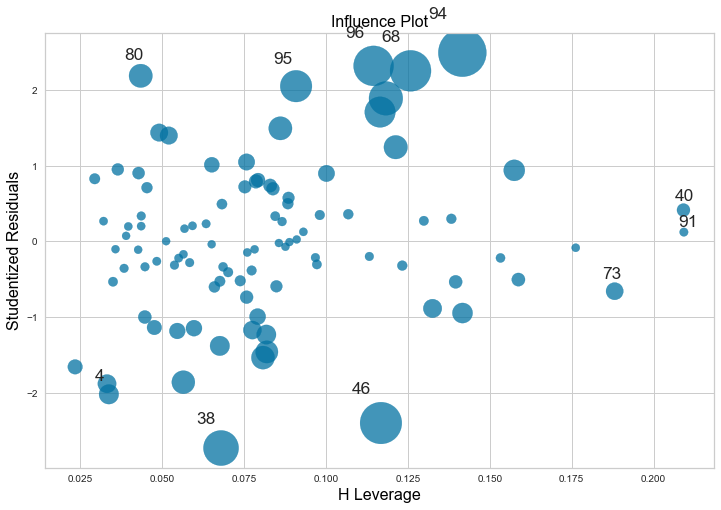

In [24]:
# Outlier detection using Cooks Distance
from yellowbrick.regressor import CooksDistance


# Instantiate and fit the visualizer
visualizer = CooksDistance().fit(xcopy,y)

#Leverage points
lm = sm.OLS(y, xcopy).fit()
studentized_residuals = olsi(lm).resid_studentized
leverage_pts = olsi(lm).hat_matrix_diag
cook_dist = olsi(lm).cooks_distance

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")

In [43]:
#the values that are greater than 2 are outliers.
studentized_residuals[abs(studentized_residuals>2)]

array([2.20036033, 2.13940467, 2.41974611, 2.01185619, 2.26081866])

In [52]:
leverg=pd.Series(leverage_pts)
critical_point= 2*(8/97)




In [53]:
#multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = xcol.columns
vif['VIF'] = [variance_inflation_factor(xcol.values, i) for i in range(xcol.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
#Correlation Matrix
cormat= xcol.corr()
cormat.style.background_gradient(cmap='Accent')

  Features    VIF
6  gleason  97.52
2      age  89.97
1  lweight  78.12
0   lcavol   4.64
7    pgg45   4.05
5      lcp   3.14
4      svi   2.49
3     lbph   1.22


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000


array([ 1.35,  3.62, 64.  ,  0.1 ,  0.  , -0.18,  6.75, 24.  ])